In [1]:
from keras.datasets.cifar10 import load_data
(x_train,y_train) , (x_test,y_test) = load_data()


Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
labels = ["飛機",  "汽車", "鳥", "貓", "鹿",
          "狗", "青蛙", "馬", "船", "卡車"]

馬


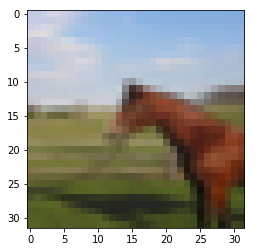

In [11]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

c = random.randint(0,49999)
print(labels[y_train[c][0]])
plt.imshow(x_train[c])


In [12]:
# 處理資料
# 常態化 normalize 配合 一開始隨機的 weight
# 記得要攤開 -> 28 * 28
# 還沒進 MPL 先卷積 不用展開
x_train_shape = x_train / 255
x_test_shape = x_test / 255

# y 必須要 one-hot encoding 3 -> [0,0,0,0,0,1,0,0,0,0
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_train_cat[c]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [20]:
from keras.models import Sequential
# 2D 維度
from keras.layers import Conv2D, MaxPooling2D, Dense
from keras.layers import Flatten
cnn = Sequential()
# param = 3*3(格子)  *  3(RGB)  *  32(filter)
# 最後加入 bias 32個 = 896
cnn.add(Conv2D(32, # filters 數量
               (3,3), # kenerl size
               activation="relu",
               padding="same",
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))

# param = 9(格子) * 32(上一層特徵) * 64(filter)  
# 加入 64(bias) = 18496
cnn.add(Conv2D(64, # filters 數量
               (3,3), # kenerl size
               activation="relu",
               padding="same",
               ))

cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(128, # filters 數量
               (3,3), # kenerl size
               activation="relu",
               padding="same",
               ))
cnn.add(MaxPooling2D(pool_size=(2,2)))

# reshape 使用 Flatten
cnn.add(Flatten())

# MLP (大腦)
cnn.add(Dense(256, activation="relu"))
# 最後一層
cnn.add(Dense(10, activation="softmax"))



cnn.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
__________

In [21]:
cnn.compile(loss="categorical_crossentropy",
           optimizer="adam",
           metrics=["accuracy"])

In [22]:
cnn.fit(x_train_shape, y_train_cat, 
        batch_size=200, epochs=10,
       validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 70s 2ms/step - loss: 1.6074 - acc: 0.4148 - val_loss: 1.3342 - val_acc: 0.5182
Epoch 2/10
45000/45000 [==============================] - 63s 1ms/step - loss: 1.1904 - acc: 0.5790 - val_loss: 1.0699 - val_acc: 0.6232
Epoch 3/10
45000/45000 [==============================] - 63s 1ms/step - loss: 1.0018 - acc: 0.6514 - val_loss: 0.9328 - val_acc: 0.6796
Epoch 4/10
45000/45000 [==============================] - 65s 1ms/step - loss: 0.8762 - acc: 0.6969 - val_loss: 0.8605 - val_acc: 0.7020
Epoch 5/10
45000/45000 [==============================] - 65s 1ms/step - loss: 0.7958 - acc: 0.7219 - val_loss: 0.8295 - val_acc: 0.7158
Epoch 6/10
45000/45000 [==============================] - 68s 2ms/step - loss: 0.7235 - acc: 0.7498 - val_loss: 0.7922 - val_acc: 0.7336
Epoch 7/10
45000/45000 [==============================] - 67s 1ms/step - loss: 0.6594 - acc: 0.7727 - val_loss: 0.7473 - val_acc:

In [23]:
cnn.evaluate(x_test_shape, y_test_cat)


10000/10000 [==============================] - 6s 648us/step


[0.7891401069641113, 0.7355]

In [24]:
# 儲存 model
cnn.save("simplecnn.h5")

In [25]:
# 讀取 model
from keras.models import load_model
old = load_model("simplecnn.h5")

old.evaluate(x_test_shape, y_test_cat)



10000/10000 [==============================] - 5s 538us/step


[0.7891401069641113, 0.7355]

In [26]:
from sklearn.metrics import confusion_matrix
import pandas as pd


pd.DataFrame(confusion_matrix(y_test, 
                 cnn.predict_classes(x_test_shape)))





,0,1,2,3,4,5,6,7,8,9
0,799,20,27,26,5,9,13,11,50,40
1,12,882,3,13,0,3,15,2,14,56
2,85,5,614,89,40,49,70,30,8,10
3,24,8,58,673,17,108,65,22,13,12
4,25,3,99,108,530,54,82,86,11,2
5,16,3,31,241,16,618,23,39,6,7
6,6,2,44,89,8,15,828,2,3,3
7,12,5,45,62,24,51,10,784,1,6
8,56,36,15,21,0,6,6,6,830,24
9,20,108,13,17,1,8,8,8,20,797
